In [2]:
# Import Modules 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("The Libraries for this assignment is imported and we are good to go now ")


The Libraries for this assignment is imported and we are good to go now 


In [3]:
# Phase 1 is Data Loading and understanding 

data = pd.read_csv('data/vehicles.csv')

print("Data loaded")
print('-'*50)
print("Data sneakpeek")
print(data.head(5))
print('-'*50)
print(f"Dataset shape : {data.shape}" )
print('-'*50)




Data loaded
--------------------------------------------------
Data sneakpeek
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_co

In [4]:
#We see alot of NAN so lets if data is missing values or not 
print(f"Missing data : {data.isnull().sum()[data.isnull().sum()>0]}")

print('-'*50)

print(f"Checking price range : {data['price'].min():,.0f} - {data['price'].max():,.0f}")


Missing data : year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64
--------------------------------------------------
Checking price range : 0 - 3,736,928,711


In [7]:
#Data cleaning and preperation

df = data.copy() #storing it in a new variable so we dont mess the input data 

#removing invalid prices (0 or extremely high(outliers))
#only keeping prices btw 1 - 200k 

df = df[(df['price'] > 0) & (df['price']<200000)]

#removing rows with missing year, manufacer and odometer cause i think this is an important featuer
df = df.dropna(subset=['year', 'manufacturer','odometer'])

#Fill missing values for other feature
df['condition'] = df['condition'].fillna('unknown')
df['transmission'] = df['transmission'].fillna('unknown')
df['fuel'] = df['fuel'].fillna('gas')
df['drive'] = df['drive'].fillna('unknown')


#cleaning the cylinder column 
df['cylinders'] = df['cylinders'].str.extract('(\d+)').astype(float)
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())


#creating the age feature because that will create an impact 
current_year = 2025
df['age'] = current_year - df['year']

#Removing bad years 
df = df[(df['age'] >= 0) & (df['age'] <= 50)]

print(f"New datas shape : {df.shape}")


New datas shape : (370156, 19)


In [9]:
#Prepare feature for modeling 

numerical_features = ['year', 'odometer', 'cylinders', 'age']


x_all = df[numerical_features].copy()
y = df['price'].copy()

#this remove any NAN values 
mask = ~(x_all.isnull().any(axis=1) | y.isnull())
x_all = x_all[mask]
y = y[mask]

print(x_all.shape, y.shape)





(370156, 4) (370156,)


In [10]:
#split test, train data using sklearn 

#70 30 split 
x_train, x_test, y_train, y_test = train_test_split(
x_all, y, test_size = 0.3, random_state=42)

print(f"Training set : {x_train.shape[0]} ")
print(f"Test set : {x_test.shape[0]} ")

Training set : 259109 
Test set : 111047 


#  Single Feature Linear Regression


------------------------------------------------------------
Feature 1 : Years
------------------------------------------------------------
Training R²: 0.2651
Test R²: 0.2635
Test MAE: $9,316.89
Test RMSE: $12,586.12
Coefficient: 1149.28
Intercept: $-2,293,574.64
------------------------------------------------------------
Feature 1 : Years Visualization
------------------------------------------------------------


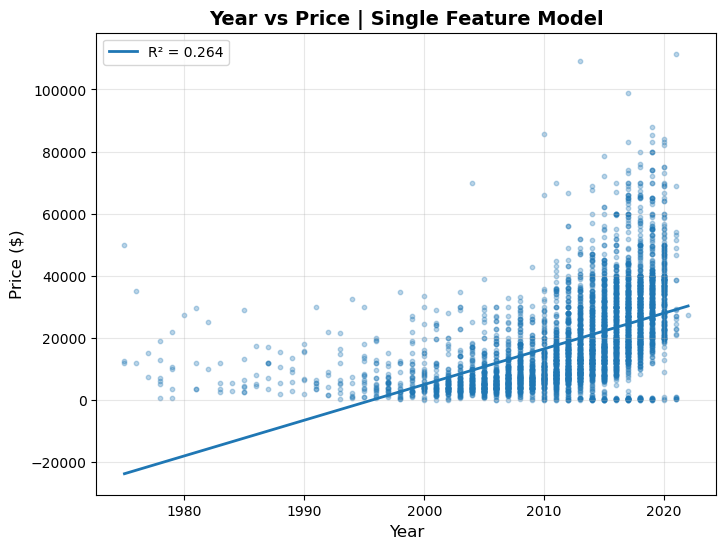

------------------------------------------------------------
Feature 2 : odometer
------------------------------------------------------------
Training R²: 0.0469
Test R²: 0.0538
Test MAE: $10,994.09
Test RMSE: $14,266.19
Coefficient: -0.02
Intercept: $20,680.30
------------------------------------------------------------
Feature 2 : Odometer Visualization
------------------------------------------------------------


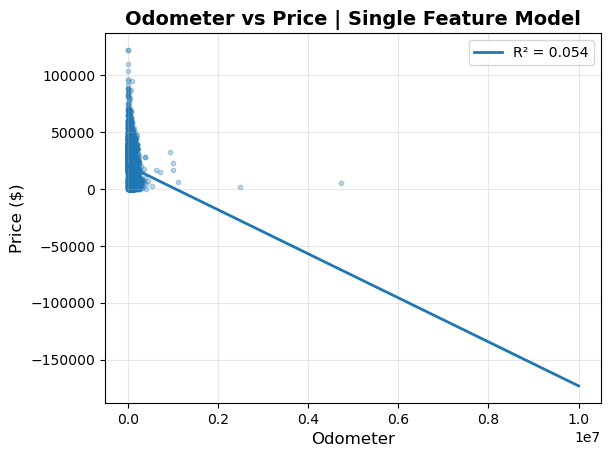

In [17]:
#Single Feature Linear Regression 
print("-" * 60)
print("Feature 1 : Years")
print("-" * 60)

x_train_year = x_train[['year']].values
x_test_year = x_test[['year']].values

#Train Linear Regression Model 
model_year = LinearRegression()
model_year.fit(x_train_year, y_train)

#Making predictions 
y_train_pred_year = model_year.predict(x_train_year)
y_test_pred_year = model_year.predict(x_test_year)


#Calculating Metrics R2 , mae, rmse 

train_r2_year = r2_score(y_train, y_train_pred_year)
test_r2_year = r2_score(y_test, y_test_pred_year)
train_mae_year = mean_absolute_error(y_train, y_train_pred_year)
test_mae_year = mean_absolute_error(y_test, y_test_pred_year)
test_rmse_year = np.sqrt(mean_squared_error(y_test, y_test_pred_year))


print(f"Training R²: {train_r2_year:.4f}")
print(f"Test R²: {test_r2_year:.4f}")
print(f"Test MAE: ${test_mae_year:,.2f}")
print(f"Test RMSE: ${test_rmse_year:,.2f}")
print(f"Coefficient: {model_year.coef_[0]:.2f}")
print(f"Intercept: ${model_year.intercept_:,.2f}")


#Visualizing Single feature for Years 
print("-" * 60)
print("Feature 1 : Years Visualization")
print("-" * 60)

plt.figure(figsize=(8, 6))

# Take a sample (optional – helps plotting look clean)
sample_idx = np.random.choice(len(x_test_year), min(5000, len(x_test_year)), replace=False)

# Scatter: Real Price vs Year
plt.scatter(x_test_year[sample_idx], y_test.iloc[sample_idx], alpha=0.3, s=10)

# Prediction Line
x_line = np.linspace(x_test_year.min(), x_test_year.max(), 100).reshape(-1, 1)
y_line = model_year.predict(x_line)
plt.plot(x_line, y_line, linewidth=2, label=f'R² = {test_r2_year:.3f}')

# Labels and Title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Year vs Price | Single Feature Model', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


#Feature 2 
print("-" * 60)
print("Feature 2 : odometer")
print("-" * 60)

x_train_year = x_train[['odometer']].values
x_test_year = x_test[['odometer']].values

#Train Linear Regression Model 
model_year = LinearRegression()
model_year.fit(x_train_year, y_train)

#Making predictions 
y_train_pred_year = model_year.predict(x_train_year)
y_test_pred_year = model_year.predict(x_test_year)


#Calculating Metrics R2 , mae, rmse 

train_r2_year = r2_score(y_train, y_train_pred_year)
test_r2_year = r2_score(y_test, y_test_pred_year)
train_mae_year = mean_absolute_error(y_train, y_train_pred_year)
test_mae_year = mean_absolute_error(y_test, y_test_pred_year)
test_rmse_year = np.sqrt(mean_squared_error(y_test, y_test_pred_year))


print(f"Training R²: {train_r2_year:.4f}")
print(f"Test R²: {test_r2_year:.4f}")
print(f"Test MAE: ${test_mae_year:,.2f}")
print(f"Test RMSE: ${test_rmse_year:,.2f}")
print(f"Coefficient: {model_year.coef_[0]:.2f}")
print(f"Intercept: ${model_year.intercept_:,.2f}")


#Visualizing Single feature for Years 
print("-" * 60)
print("Feature 2 : Odometer Visualization")
print("-" * 60)



# Take a sample (optional – helps plotting look clean)
sample_idx = np.random.choice(len(x_test_year), min(5000, len(x_test_year)), replace=False)

# Scatter: Real Price vs Year
plt.scatter(x_test_year[sample_idx], y_test.iloc[sample_idx], alpha=0.3, s=10)

# Prediction Line
x_line = np.linspace(x_test_year.min(), x_test_year.max(), 100).reshape(-1, 1)
y_line = model_year.predict(x_line)
plt.plot(x_line, y_line, linewidth=2, label=f'R² = {test_r2_year:.3f}')

# Labels and Title
plt.xlabel('Odometer', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Odometer vs Price | Single Feature Model', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()




------------------------------------------------------------
Feature 3 : cylinders
------------------------------------------------------------
Training R²: 0.0674
Test R²: 0.0669
Test MAE: $10,952.24
Test RMSE: $14,166.47
Coefficient: 3125.99
Intercept: $175.04
------------------------------------------------------------
Feature 3 : cylinders Visualization
------------------------------------------------------------


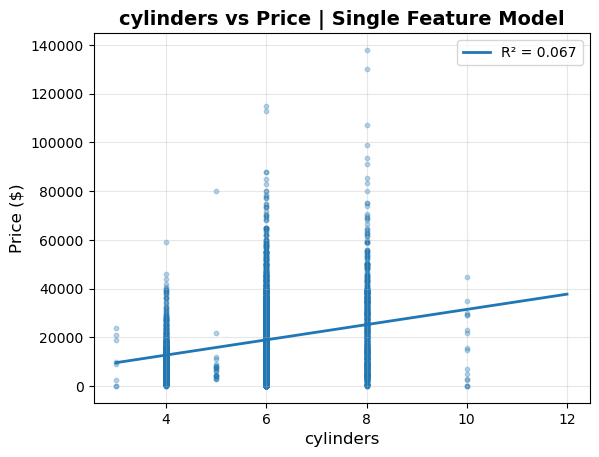

------------------------------------------------------------
Feature 4 : age
------------------------------------------------------------
Training R²: 0.2651
Test R²: 0.2635
Test MAE: $9,316.89
Test RMSE: $12,586.12
Coefficient: -1149.28
Intercept: $33,708.24
------------------------------------------------------------
Feature 4 : age Visualization
------------------------------------------------------------


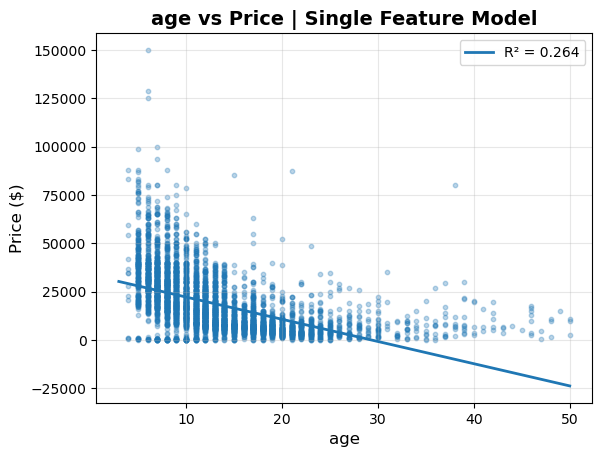

In [19]:


#Feature 3
print("-" * 60)
print("Feature 3 : cylinders")
print("-" * 60)

x_train_year = x_train[['cylinders']].values
x_test_year = x_test[['cylinders']].values

#Train Linear Regression Model 
model_year = LinearRegression()
model_year.fit(x_train_year, y_train)

#Making predictions 
y_train_pred_year = model_year.predict(x_train_year)
y_test_pred_year = model_year.predict(x_test_year)


#Calculating Metrics R2 , mae, rmse 

train_r2_year = r2_score(y_train, y_train_pred_year)
test_r2_year = r2_score(y_test, y_test_pred_year)
train_mae_year = mean_absolute_error(y_train, y_train_pred_year)
test_mae_year = mean_absolute_error(y_test, y_test_pred_year)
test_rmse_year = np.sqrt(mean_squared_error(y_test, y_test_pred_year))


print(f"Training R²: {train_r2_year:.4f}")
print(f"Test R²: {test_r2_year:.4f}")
print(f"Test MAE: ${test_mae_year:,.2f}")
print(f"Test RMSE: ${test_rmse_year:,.2f}")
print(f"Coefficient: {model_year.coef_[0]:.2f}")
print(f"Intercept: ${model_year.intercept_:,.2f}")


#Visualizing Single feature for cylinders 
print("-" * 60)
print("Feature 3 : cylinders Visualization")
print("-" * 60)



# Take a sample (optional – helps plotting look clean)
sample_idx = np.random.choice(len(x_test_year), min(5000, len(x_test_year)), replace=False)

# Scatter: Real Price vs Year
plt.scatter(x_test_year[sample_idx], y_test.iloc[sample_idx], alpha=0.3, s=10)

# Prediction Line
x_line = np.linspace(x_test_year.min(), x_test_year.max(), 100).reshape(-1, 1)
y_line = model_year.predict(x_line)
plt.plot(x_line, y_line, linewidth=2, label=f'R² = {test_r2_year:.3f}')

# Labels and Title
plt.xlabel('cylinders', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('cylinders vs Price | Single Feature Model', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()




#Feature 3
print("-" * 60)
print("Feature 4 : age")
print("-" * 60)

x_train_year = x_train[['age']].values
x_test_year = x_test[['age']].values

#Train Linear Regression Model 
model_year = LinearRegression()
model_year.fit(x_train_year, y_train)

#Making predictions 
y_train_pred_year = model_year.predict(x_train_year)
y_test_pred_year = model_year.predict(x_test_year)


#Calculating Metrics R2 , mae, rmse 

train_r2_year = r2_score(y_train, y_train_pred_year)
test_r2_year = r2_score(y_test, y_test_pred_year)
train_mae_year = mean_absolute_error(y_train, y_train_pred_year)
test_mae_year = mean_absolute_error(y_test, y_test_pred_year)
test_rmse_year = np.sqrt(mean_squared_error(y_test, y_test_pred_year))


print(f"Training R²: {train_r2_year:.4f}")
print(f"Test R²: {test_r2_year:.4f}")
print(f"Test MAE: ${test_mae_year:,.2f}")
print(f"Test RMSE: ${test_rmse_year:,.2f}")
print(f"Coefficient: {model_year.coef_[0]:.2f}")
print(f"Intercept: ${model_year.intercept_:,.2f}")


#Visualizing Single feature for cylinders 
print("-" * 60)
print("Feature 4 : age Visualization")
print("-" * 60)



# Take a sample (optional – helps plotting look clean)
sample_idx = np.random.choice(len(x_test_year), min(5000, len(x_test_year)), replace=False)

# Scatter: Real Price vs Year
plt.scatter(x_test_year[sample_idx], y_test.iloc[sample_idx], alpha=0.3, s=10)

# Prediction Line
x_line = np.linspace(x_test_year.min(), x_test_year.max(), 100).reshape(-1, 1)
y_line = model_year.predict(x_line)
plt.plot(x_line, y_line, linewidth=2, label=f'R² = {test_r2_year:.3f}')

# Labels and Title
plt.xlabel('age', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('age vs Price | Single Feature Model', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Polynomial Feature Comparison between x^3 and x^2 for Years

In [29]:
print("\n" + "=" * 60)
print("MODEL 1: POLYNOMIAL FEATURES - YEAR (Degree 3)")
print("=" * 60)

X_train_year = x_train[['year']].values
X_test_year = x_test[['year']].values


# Create polynomial features of degree 3 (includes x, x², and x³)
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_year_poly3 = poly_features_3.fit_transform(X_train_year)
X_test_year_poly3 = poly_features_3.transform(X_test_year)


# Train linear regression model with polynomial features
model_year_poly3 = LinearRegression()
model_year_poly3.fit(X_train_year_poly3, y_train)


# Make predictions
y_train_pred_year_poly3 = model_year_poly3.predict(X_train_year_poly3)
y_test_pred_year_poly3 = model_year_poly3.predict(X_test_year_poly3)


# Calculate metrics
train_r2_year_poly3 = r2_score(y_train, y_train_pred_year_poly3)
test_r2_year_poly3 = r2_score(y_test, y_test_pred_year_poly3)
test_mae_year_poly3 = mean_absolute_error(y_test, y_test_pred_year_poly3)
test_rmse_year_poly3 = np.sqrt(mean_squared_error(y_test, y_test_pred_year_poly3))


print(f"Training R²: {train_r2_year_poly3:.4f}")
print(f"Test R²: {test_r2_year_poly3:.4f}")
print(f"Test MAE: ${test_mae_year_poly3:,.2f}")
print(f"Test RMSE: ${test_rmse_year_poly3:,.2f}")
print(f"Features: {poly_features_3.get_feature_names_out(['year'])}")
print(f"Coefficients: {model_year_poly3.coef_}")


print("\n" + "=" * 60)
print("MODEL 2: POLYNOMIAL FEATURES - YEAR (Degree 2)")
print("=" * 60)

X_train_year = x_train[['year']].values
X_test_year = x_test[['year']].values


# Create polynomial features of degree 3 (includes x, x², )
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_year_poly2 = poly_features_2.fit_transform(X_train_year)
X_test_year_poly2 = poly_features_2.transform(X_test_year)


# Train linear regression model with polynomial features
model_year_poly2 = LinearRegression()
model_year_poly2.fit(X_train_year_poly2, y_train)


# Make predictions
y_train_pred_year_poly2 = model_year_poly2.predict(X_train_year_poly2)
y_test_pred_year_poly2 = model_year_poly2.predict(X_test_year_poly2)


# Calculate metrics
train_r2_year_poly2 = r2_score(y_train, y_train_pred_year_poly2)
test_r2_year_poly2 = r2_score(y_test, y_test_pred_year_poly2)
test_mae_year_poly2 = mean_absolute_error(y_test, y_test_pred_year_poly2)
test_rmse_year_poly2 = np.sqrt(mean_squared_error(y_test, y_test_pred_year_poly2))


print(f"Training R²: {train_r2_year_poly2:.4f}")
print(f"Test R²: {test_r2_year_poly2:.4f}")
print(f"Test MAE: ${test_mae_year_poly2:,.2f}")
print(f"Test RMSE: ${test_rmse_year_poly2:,.2f}")
print(f"Features: {poly_features_2.get_feature_names_out(['year'])}")
print(f"Coefficients: {model_year_poly2.coef_}")



MODEL 1: POLYNOMIAL FEATURES - YEAR (Degree 3)
Training R²: 0.3831
Test R²: 0.3859
Test MAE: $8,037.25
Test RMSE: $11,493.31
Features: ['year' 'year^2' 'year^3']
Coefficients: [ 2.15383456e+07 -1.08129695e+04  1.80945298e+00]

MODEL 2: POLYNOMIAL FEATURES - YEAR (Degree 2)
Training R²: 0.3696
Test R²: 0.3720
Test MAE: $8,174.75
Test RMSE: $11,622.11
Features: ['year' 'year^2']
Coefficients: [-2.34971417e+05  5.88303104e+01]


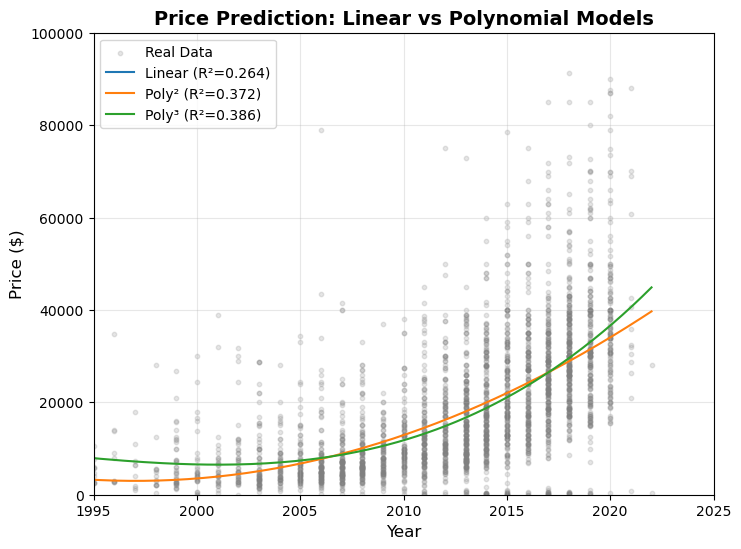

In [31]:
#visualize linear vs polyn

sample_idx = np.random.choice(len(X_test_year), min(3000, len(X_test_year)), replace=False)

plt.figure(figsize=(8, 6))

# 1. Scatter plot (real data)
plt.scatter(X_test_year[sample_idx], y_test.iloc[sample_idx], 
            alpha=0.2, s=10, color='gray', label='Real Data')

# 2. Create x-axis line for predictions
x_line = np.linspace(X_test_year.min(), X_test_year.max(), 200).reshape(-1, 1)

# 3. Linear model line
y_line_linear = model_year.predict(x_line)
plt.plot(x_line, y_line_linear, label=f'Linear (R²={test_r2_year:.3f})')

# 4. Polynomial degree 2
x_line_poly2 = poly_features_2.transform(x_line)
y_line_poly2 = model_year_poly2.predict(x_line_poly2)
plt.plot(x_line, y_line_poly2, label=f'Poly² (R²={test_r2_year_poly2:.3f})')

# 5. Polynomial degree 3
x_line_poly3 = poly_features_3.transform(x_line)
y_line_poly3 = model_year_poly3.predict(x_line_poly3)
plt.plot(x_line, y_line_poly3, label=f'Poly³ (R²={test_r2_year_poly3:.3f})')

# Labels & styling
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price Prediction: Linear vs Polynomial Models', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.ylim(0, 100000)       
plt.xlim(1995, 2025)  

plt.show()

# Multiple Dimension 

In [33]:
print("\n" + "=" * 60)
print("MODEL: MULTIPLE LINEAR REGRESSION (4 FEATURES)")
print("=" * 60)

# 1. Choose 4 features 
features_4d = ['year', 'odometer', 'age', 'cylinders'] 

# 2. Build X matrices from train/test using only those 4 columns
X_train_4d = x_train[features_4d].values
X_test_4d  = x_test[features_4d].values

# 3. Create and train the model
model_4d = LinearRegression()
model_4d.fit(X_train_4d, y_train)

# 4. Predictions
y_train_pred_4d = model_4d.predict(X_train_4d)
y_test_pred_4d  = model_4d.predict(X_test_4d)

# 5. Metrics
train_r2_4d = r2_score(y_train, y_train_pred_4d)
test_r2_4d  = r2_score(y_test, y_test_pred_4d)
test_mae_4d = mean_absolute_error(y_test, y_test_pred_4d)
test_rmse_4d = np.sqrt(mean_squared_error(y_test, y_test_pred_4d))

# 6. Print results
print(f"Training R²: {train_r2_4d:.4f}")
print(f"Test R²: {test_r2_4d:.4f}")
print(f"Test MAE: ${test_mae_4d:,.2f}")
print(f"Test RMSE: ${test_rmse_4d:,.2f}")




MODEL: MULTIPLE LINEAR REGRESSION (4 FEATURES)
Training R²: 0.3717
Test R²: 0.3718
Test MAE: $8,209.70
Test RMSE: $11,623.93


# Multiple dimension + Polynomial Feature of Degree 2

In [39]:
X_train_4d = x_train[features_4d].values
X_test_4d  = x_test[features_4d].values

# 3. Polynomial Features (DEGREE = 2)
poly_4d = PolynomialFeatures(degree=2, include_bias=False)
X_train_4d_poly2 = poly_4d.fit_transform(X_train_4d)
X_test_4d_poly2 = poly_4d.transform(X_test_4d)

# 4. Train Model
model_4d_poly2 = LinearRegression()
model_4d_poly2.fit(X_train_4d_poly2, y_train)

# 5. Predictions
y_train_pred_4d_poly2 = model_4d_poly2.predict(X_train_4d_poly2)
y_test_pred_4d_poly2  = model_4d_poly2.predict(X_test_4d_poly2)

# 6. Metrics
train_r2_4d_poly2 = r2_score(y_train, y_train_pred_4d_poly2)
test_r2_4d_poly2  = r2_score(y_test, y_test_pred_4d_poly2)
test_mae_4d_poly2 = mean_absolute_error(y_test, y_test_pred_4d_poly2)
test_rmse_4d_poly2 = np.sqrt(mean_squared_error(y_test, y_test_pred_4d_poly2))

# 7. Output Results
print(f"\nTraining R²: {train_r2_4d_poly2:.4f}")
print(f"Test R²: {test_r2_4d_poly2:.4f}")
print(f"Test MAE: ${test_mae_4d_poly2:,.2f}")
print(f"Test RMSE: ${test_rmse_4d_poly2:,.2f}")


Training R²: 0.4879
Test R²: 0.4906
Test MAE: $6,984.82
Test RMSE: $10,467.73


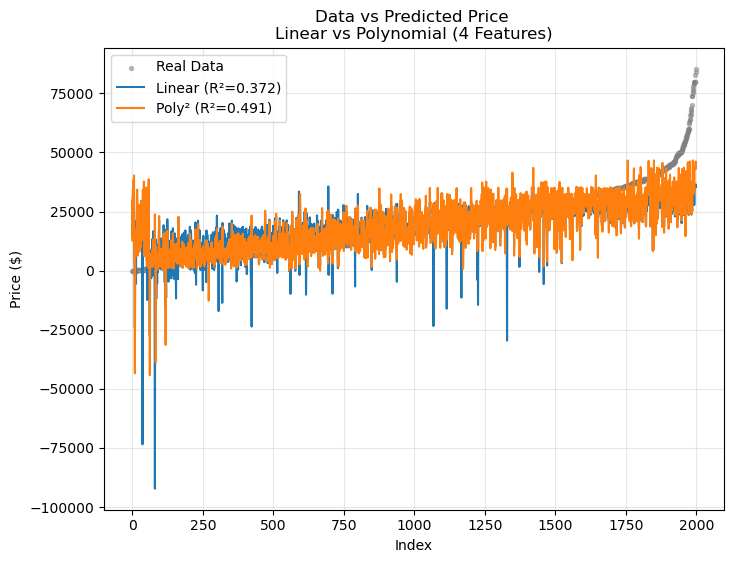

In [ ]:
# Visualization: Linear vs Polynomial (4 Features)
sorted_idx = np.argsort(y_test.values)
y_sorted = y_test.values[sorted_idx]
y_pred_linear_sorted = y_test_pred_4d[sorted_idx]
y_pred_poly_sorted = y_test_pred_4d_poly2[sorted_idx]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_sorted)), y_sorted, s=8, alpha=0.5, label='Real Data', color='gray')

# Linear Model Prediction (line)
plt.plot(range(len(y_sorted)), y_pred_linear_sorted, label=f'Linear (R²={test_r2_4d:.3f})')

# Polynomial Model Prediction (line)
plt.plot(range(len(y_sorted)), y_pred_poly_sorted, label=f'Poly² (R²={test_r2_4d_poly2:.3f})')

plt.xlabel('Index')
plt.ylabel('Price ($)')
plt.title('Data vs Predicted Price \nLinear vs Polynomial (4 Features)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
